## Import required libraries

In [5]:
import os
import pandas as pd
import numpy as np
import re
import seaborn as sns
from string import ascii_letters
import math 
import random
import pickle
import codecs
import random
%matplotlib notebook
import matplotlib as mpl
mpl.get_backend()
import matplotlib.pyplot as plt


## Getting the data in desired structure

In [18]:
folder_folders = os.walk("/home/alone/Documents/GNR631_tutorial/spectral_signatures/All_spectra")
folder_list = []
folder_names = []
for root, dirs, files in os.walk("/home/alone/Documents/GNR631_tutorial/spectral_signatures/All_spectra", topdown=False):
    for name in dirs:
        if not os.path.isfile(os.path.join(root, name)):
            folder_list.append(os.path.join(root, name))
            folder_names.append(name)
            print (os.path.join(root, name))
# print(folder_list)
print(folder_names)

all_data_dict = {}
for k in range(len(folder_list)):
    all_data = pd.DataFrame(columns=["Lambda"])
    file_list = os.listdir(folder_list[k])
    for j in range(len(file_list)):
        raw_data = open(os.path.join(folder_list[k],file_list[j]), "r")
        f = raw_data.readlines()
        usable_part = f[78:459]
        usable_part = [i.split("  ") for i in usable_part]
        data = pd.DataFrame(usable_part)
        for index,rows in data.iterrows():
            re_pattern = r"(.*)\n"
            data.set_value(index, 2, re.search(re_pattern, rows[2]).group(1))
        data.columns=["Lambda","target","ref"]
        data.ref=pd.to_numeric(data.ref)
        data.target=pd.to_numeric(data.target)
        Reflectance=(data.target)/(data.ref)
        data=data.drop("ref",1)
        data=data.drop("target",1)
        if all_data["Lambda"].empty:
            all_data["Lambda"] = data["Lambda"]
        all_data["R"+str(j+1)]=Reflectance
    all_data_dict [folder_names[k]] = all_data
    
print("all_data_dict is a dictionary where key is folder name and stored values are dataFrame consists of reflectance values of that folder ")

/home/alone/Documents/GNR631_tutorial/spectral_signatures/All_spectra/test
/home/alone/Documents/GNR631_tutorial/spectral_signatures/All_spectra/wet_soil
/home/alone/Documents/GNR631_tutorial/spectral_signatures/All_spectra/water
/home/alone/Documents/GNR631_tutorial/spectral_signatures/All_spectra/vagetation
/home/alone/Documents/GNR631_tutorial/spectral_signatures/All_spectra/dry_soil
/home/alone/Documents/GNR631_tutorial/spectral_signatures/All_spectra/mixed
['test', 'wet_soil', 'water', 'vagetation', 'dry_soil', 'mixed']


/home/alone/.local/lib/python3.5/site-packages/ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


all_data_dict is a dictionary where key is folder name and stored values are dataFrame consists of reflectance values of that folder 


## Here all_data_dict is a dictionary where key is folder name and stored values are dataFrame consists of reflectance values of that folder 

## Let's plot the data

<IPython.core.display.Javascript object>


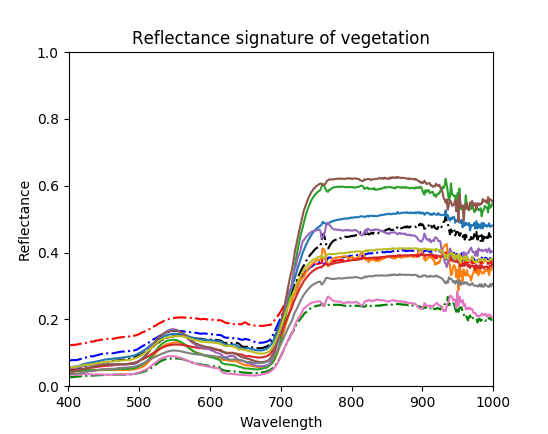

Text(0.5,1,'Reflectance signature of vegetation')

In [7]:
plt.figure()
veg=all_data_dict['vagetation']
plt.plot(pd.to_numeric(veg.Lambda),pd.to_numeric(veg.R1), '-.r')
plt.plot(pd.to_numeric(veg.Lambda),pd.to_numeric(veg.R2), '-.g')
plt.plot(pd.to_numeric(veg.Lambda),pd.to_numeric(veg.R3), '-.b')
plt.plot(pd.to_numeric(veg.Lambda),pd.to_numeric(veg.R4), '-.k')
plt.plot(pd.to_numeric(veg.Lambda),pd.to_numeric(veg.R5))
plt.plot(pd.to_numeric(veg.Lambda),pd.to_numeric(veg.R6))
plt.plot(pd.to_numeric(veg.Lambda),pd.to_numeric(veg.R7))
plt.plot(pd.to_numeric(veg.Lambda),pd.to_numeric(veg.R8))
plt.plot(pd.to_numeric(veg.Lambda),pd.to_numeric(veg.R9))
plt.plot(pd.to_numeric(veg.Lambda),pd.to_numeric(veg.R10))
plt.plot(pd.to_numeric(veg.Lambda),pd.to_numeric(veg.R11))
plt.plot(pd.to_numeric(veg.Lambda),pd.to_numeric(veg.R12))
plt.plot(pd.to_numeric(veg.Lambda),pd.to_numeric(veg.R13))

plt.xlabel("Wavelength")
ax=plt.gca()
ax.axis([400,1000,0,1])
plt.ylabel("Reflectance")
plt.title("Reflectance signature of vegetation")

<IPython.core.display.Javascript object>


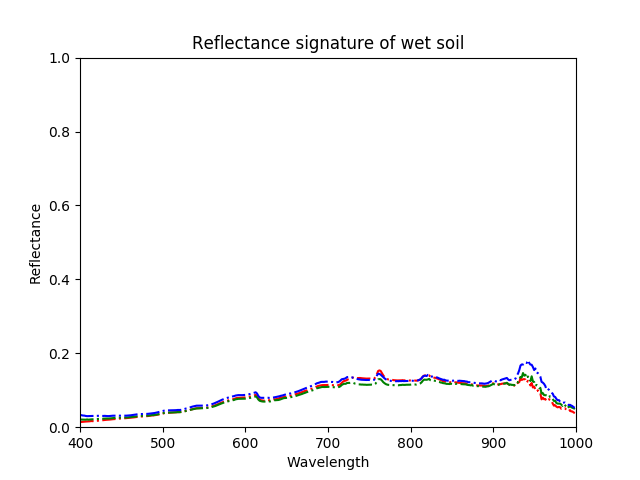

Text(0.5,1,'Reflectance signature of wet soil')

In [9]:
plt.figure()
wsoil=all_data_dict['wet_soil']
plt.plot(pd.to_numeric(wsoil.Lambda),pd.to_numeric(wsoil.R1), '-.r')
plt.plot(pd.to_numeric(wsoil.Lambda),pd.to_numeric(wsoil.R2), '-.g')
plt.plot(pd.to_numeric(wsoil.Lambda),pd.to_numeric(wsoil.R3), '-.b')
# plt.plot(pd.to_numeric(veg.Lambda),pd.to_numeric(veg.R4), '-.k')

plt.xlabel("Wavelength")
ax=plt.gca()
ax.axis([400,1000,0,1])
plt.ylabel("Reflectance")
plt.title("Reflectance signature of wet soil")

<IPython.core.display.Javascript object>


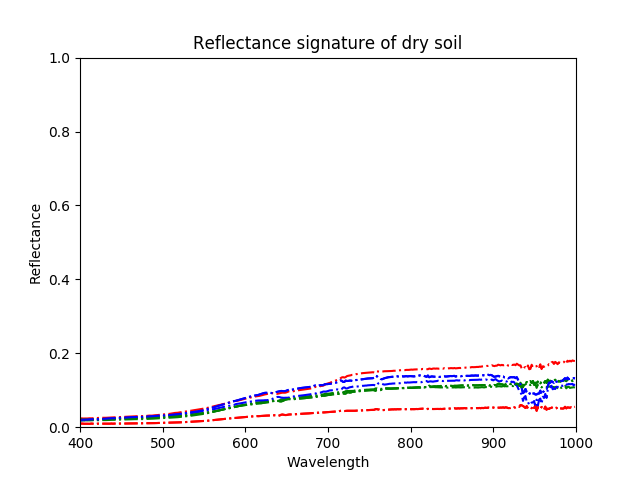

Text(0.5,1,'Reflectance signature of dry soil')

In [17]:
plt.figure()
dsoil=all_data_dict['dry_soil']
plt.plot(pd.to_numeric(dsoil.Lambda),pd.to_numeric(dsoil.R1), '-.r')
plt.plot(pd.to_numeric(dsoil.Lambda),pd.to_numeric(dsoil.R2), '-.g')
plt.plot(pd.to_numeric(dsoil.Lambda),pd.to_numeric(dsoil.R3), '-.b')
plt.plot(pd.to_numeric(dsoil.Lambda),pd.to_numeric(dsoil.R4), '-.r')
plt.plot(pd.to_numeric(dsoil.Lambda),pd.to_numeric(dsoil.R5), '-.g')
plt.plot(pd.to_numeric(dsoil.Lambda),pd.to_numeric(dsoil.R6), '-.b')

plt.xlabel("Wavelength")
ax=plt.gca()
ax.axis([400,1000,0,1])
plt.ylabel("Reflectance")
plt.title("Reflectance signature of dry soil")

<IPython.core.display.Javascript object>


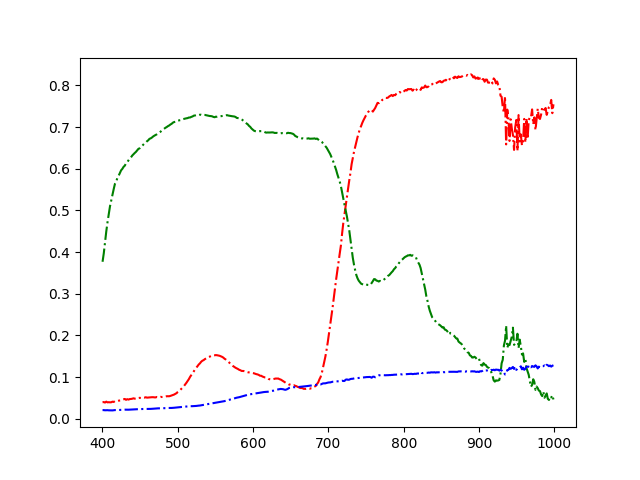

In [21]:
plt.figure()
test=all_data_dict['test']
plt.plot(pd.to_numeric(test.Lambda),pd.to_numeric(test.R1), '-.r')
plt.plot(pd.to_numeric(test.Lambda),pd.to_numeric(test.R2), '-.g')
plt.plot(pd.to_numeric(test.Lambda),pd.to_numeric(test.R3), '-.b')

<IPython.core.display.Javascript object>


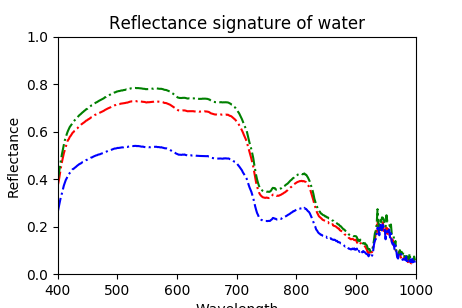

Text(0.5,1,'Reflectance signature of water')

In [10]:
plt.figure()
wat=all_data_dict['water']
plt.plot(pd.to_numeric(wat.Lambda),pd.to_numeric(wat.R1), '-.r')
plt.plot(pd.to_numeric(wat.Lambda),pd.to_numeric(wat.R2), '-.g')
plt.plot(pd.to_numeric(wat.Lambda),pd.to_numeric(wat.R3), '-.b')

plt.xlabel("Wavelength")
ax=plt.gca()
ax.axis([400,1000,0,1])
plt.ylabel("Reflectance")
plt.title("Reflectance signature of water")

## Let's Analyse mixed folder. vegetation vs Non-vegetation

In [13]:
mix=all_data_dict["mixed"]
# print(type(no_stress))
mix.head()
rat=mix.set_index("Lambda")
mat=rat.T
# mat.head()
NIR = mat["811.65"]
R = mat["699.21"]
NDVI = (NIR - R)/(NIR + R)
NDVI
# j=0
# for i in healthy:
#     if i>=0.5:
#         j=j+1
# print(j)

R1     0.465779
R2     0.141475
R3     0.481452
R4     0.098689
R5     0.593040
R6     0.105936
R7     0.092327
R8     0.085633
R9     0.023489
R10    0.041378
R11    0.534048
R12    0.657412
R13    0.661485
R14    0.111173
R15    0.060465
R16    0.540902
R17    0.260430
R18    0.541821
dtype: float64

<IPython.core.display.Javascript object>


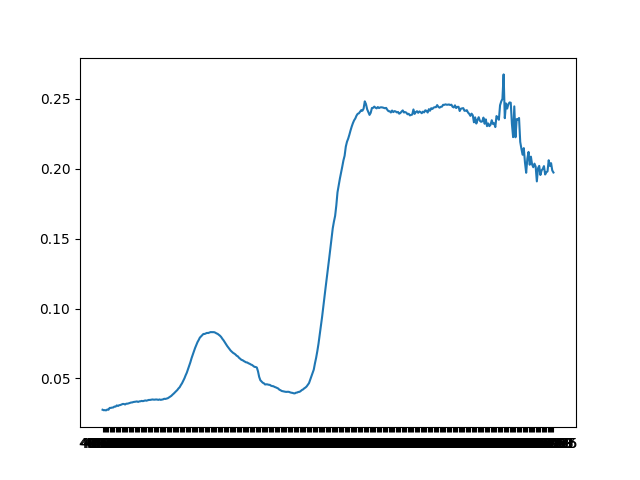

In [16]:
plt.figure()
plt.plot(mix.Lambda,mix.R1)


## Let's take vegetation data and analyse it

In [61]:
veg.head()

,Lambda,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R75,R76,R77,R78,R79,R80,R81,R82,R83,R84
0,400.35,0.121841,0.027587,0.077756,0.047412,0.056776,0.040228,0.048516,0.046793,0.055167,...,0.092867,0.037074,0.023589,0.050817,0.039751,0.030739,0.033213,0.060912,0.042801,0.048434
1,402.00,0.123063,0.027229,0.077415,0.047854,0.056359,0.043452,0.046154,0.046746,0.055047,...,0.090620,0.037183,0.023809,0.050477,0.038121,0.030601,0.032536,0.059143,0.043421,0.049364
2,403.64,0.123230,0.027314,0.077881,0.048198,0.056456,0.042402,0.045259,0.047607,0.055601,...,0.089490,0.037205,0.023963,0.052027,0.038364,0.030100,0.033295,0.061469,0.043793,0.049925
3,405.29,0.123656,0.027107,0.078322,0.049196,0.057302,0.042299,0.045952,0.047050,0.054891,...,0.087327,0.037110,0.023989,0.052298,0.038233,0.030235,0.033385,0.060522,0.044306,0.050818
4,406.93,0.124082,0.027761,0.078544,0.049413,0.058015,0.043941,0.043388,0.047483,0.055734,...,0.087223,0.037039,0.024548,0.052281,0.038170,0.031131,0.032171,0.061593,0.044701,0.051214


## Finding uncorrelated wavelengths

<IPython.core.display.Javascript object>


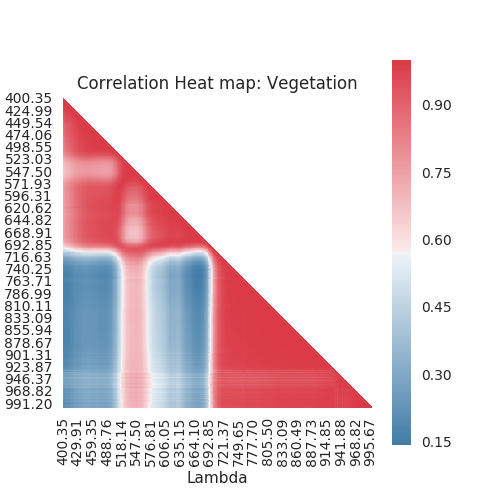

Text(0.5,1,'Correlation Heat map: Vegetation')

In [62]:
dog = veg.set_index('Lambda')
dog.head()
cat= dog.T
cat.head()
# Compute the correlation matrix
sns.set(style="white")
corr = cat.corr()
corr
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
# mask
mask[np.triu_indices_from(mask)] = True
# matrix=mask*corr
# matrix
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5,5))
# sns.choose_diverging_palette()
# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, sep=1, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=None, square=True)
plt.title("Correlation Heat map: Vegetation")
# corr

In [32]:
corr_columns = corr.columns.values
imp_lambda = []
for index, row in corr.iterrows():
#     print(index)
    for i in range(len(corr_columns)):
        if row[corr_columns[i]] < 0.5:
            if index not in imp_lambda:
                imp_lambda.append(index)
                if corr_columns[i] not in imp_lambda:
                    imp_lambda.append(corr_columns[i])

imp_lambda = sorted([float(x) for x in imp_lambda])
# print(imp_lambda)
imp_lambda = [str(x) for x in imp_lambda]
# imp_lambda = list(set(imp_lambda))
for i in range(len(imp_lambda)):
    if re.match(r"^[0-9]+\.[0-9]{1}$", imp_lambda[i]):
        imp_lambda[i] = imp_lambda[i] + "0"
print(len(imp_lambda))
print(imp_lambda)

28
['636.77', '638.38', '639.99', '641.60', '643.21', '644.82', '646.43', '648.04', '651.26', '652.86', '654.47', '656.08', '657.68', '659.29', '660.89', '662.50', '664.10', '755.91', '757.47', '759.03', '760.59', '762.15', '814.72', '928.38', '929.88', '931.38', '946.37', '956.85']


<IPython.core.display.Javascript object>


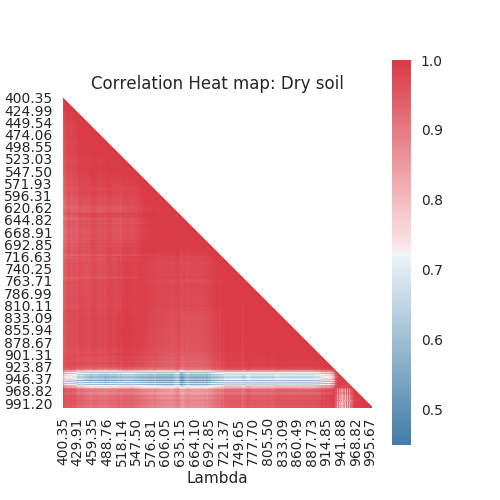

Text(0.5,1,'Correlation Heat map: Dry soil')

In [63]:
panda = dsoil.set_index('Lambda')
# panda.head()
cub= panda.T
# cub.head()
# Compute the correlation matrix
sns.set(style="white")
corr = cub.corr()
corr
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
# mask
mask[np.triu_indices_from(mask)] = True
# matrix=mask*corr
# matrix
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5,5))
# sns.choose_diverging_palette()
# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, sep=1, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=None, square=True)
plt.title("Correlation Heat map: Dry soil")
# corr

In [43]:
corr_columns = corr.columns.values
imp_lambda = []
for index, row in corr.iterrows():
#     print(index)
    for i in range(len(corr_columns)):
        if row[corr_columns[i]] < 0.5:
            if index not in imp_lambda:
                imp_lambda.append(index)
                if corr_columns[i] not in imp_lambda:
                    imp_lambda.append(corr_columns[i])

imp_lambda = sorted([float(x) for x in imp_lambda])
# print(imp_lambda)
imp_lambda = [str(x) for x in imp_lambda]
# imp_lambda = list(set(imp_lambda))
for i in range(len(imp_lambda)):
    if re.match(r"^[0-9]+\.[0-9]{1}$", imp_lambda[i]):
        imp_lambda[i] = imp_lambda[i] + "0"
print(len(imp_lambda))
print(imp_lambda)

12
['487.12', '589.82', '636.77', '638.38', '639.99', '641.60', '643.21', '688.07', '944.87', '947.87', '950.87', '953.86']


In [73]:
cat.head()
NIR = cat["811.65"]
R = cat["699.21"]
NDVI = (NIR - R)/(NIR + R)
healthy=NDVI[:42]
j=0
for i in healthy:
    if i>=0.5:
        j=j+1
print(j)

19


R1     0.465779
R2     0.141475
R3     0.481452
R4     0.098689
R5     0.593040
R6     0.105936
R7     0.092327
R8     0.085633
R9     0.023489
R10    0.041378
R11    0.534048
R12    0.657412
R13    0.661485
R14    0.111173
R15    0.060465
R16    0.540902
R17    0.260430
R18    0.541821
dtype: float64